In [23]:
import numpy as np
import math
from pprint import pprint
import matplotlib.pyplot as plt 
from annfuncs import *

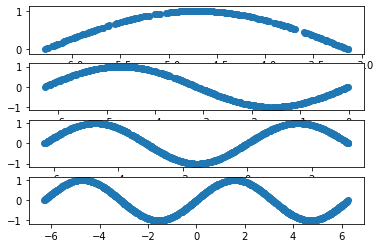

In [24]:
#creating sin data
import random
inputvals=[]
outputvals=[]

for i in range(0,4):
    for j in range(0,250):
        x=random.uniform(-2*math.pi + i*math.pi,-1*math.pi+i*math.pi)
        inputvals.append(x)
        y=math.sin(x)
        outputvals.append(y)
    plt.subplot(4,1,i+1)
    plt.scatter(inputvals,outputvals) 



In [25]:
# test values
test=[]
for j in range(0,300):
        test.append(random.uniform(-2*math.pi,2*math.pi))
        

In [26]:
# layers_dims = [1,275,175,50,1] #  4-layer 
# layers_dims = [1,80,40,20,1] #  4-layer model
layers_dims = [1,20,20,1] #  4-layer model

train_x=np.array(inputvals).reshape(1,1000)
train_y=np.array(outputvals).reshape(1,1000)

In [27]:
train_y.shape

(1, 1000)

Cost after epoch 0: 0.168842
Cost after epoch 1: 0.066178
Cost after epoch 2: 0.038011
Cost after epoch 3: 0.031182
Cost after epoch 4: 0.029034
Cost after epoch 5: 0.029414
Cost after epoch 6: 0.032196
Cost after epoch 7: 0.029295
Cost after epoch 8: 0.029313
Cost after epoch 9: 0.030448
Cost after epoch 10: 0.030795
Cost after epoch 11: 0.030768
Cost after epoch 12: 0.030807
Cost after epoch 13: 0.029615
Cost after epoch 14: 0.031128
Cost after epoch 15: 0.028037
Cost after epoch 16: 0.029534
Cost after epoch 17: 0.028084
Cost after epoch 18: 0.029268
Cost after epoch 19: 0.028341
Cost after epoch 20: 0.031191
Cost after epoch 21: 0.028070
Cost after epoch 22: 0.028221
Cost after epoch 23: 0.028542
Cost after epoch 24: 0.028778
Cost after epoch 25: 0.027875
Cost after epoch 26: 0.029769
Cost after epoch 27: 0.028306
Cost after epoch 28: 0.027352
Cost after epoch 29: 0.028813
Cost after epoch 30: 0.029023
Cost after epoch 31: 0.027087
Cost after epoch 32: 0.026751
Cost after epoch 33:

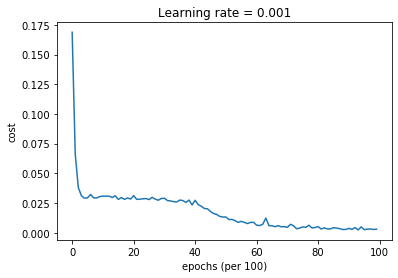

In [38]:
# parameters = L_layer_model(train_x, train_y, layers_dims, num_iterations = 5000,learning_rate = 0.001, print_cost = True,
#                            lambd=0.1,optimizer="adam", beta = 0.9,beta1 = 0.9, beta2 = 0.999,  epsilon = 1e-8,activation='tanh',
#                           regularisation='L2')

parameters = L_layer_model_minib(train_x, train_y, layers_dims, valid=False, num_iterations = 100,learning_rate = 0.001, 
                            print_cost = True,lambd=0.1,optimizer="adam", beta = 0.9,beta1 = 0.9, beta2 = 0.999,epsilon = 1e-8,
                            activation='tanh',regularisation='none',mini_batch_size=1,cost_func="mse",he_init=True)

In [39]:
pred_train = predictvals(train_x, parameters,activation='tanh')
# cost=predictacc(train_x,train_y,parameters)

In [40]:
pprint(pred_train)
# pprint(train_x)

array([[ 4.05821953e-01,  6.46893692e-01,  9.03503354e-01,
         7.97043214e-01,  8.23378897e-01,  9.21378198e-01,
         9.18554449e-01,  9.35435614e-01,  9.18925371e-01,
         2.16502645e-01,  8.98296639e-01,  9.14760161e-01,
         6.05997649e-01,  6.64467233e-01,  2.57262441e-01,
        -2.04049562e-02,  7.88627661e-01,  9.36775243e-01,
         4.74573148e-01,  6.86428767e-01,  6.49166596e-01,
         2.18526428e-01,  8.98423368e-01,  1.31172983e-01,
         7.29506747e-01,  7.11137417e-01,  2.93178457e-01,
         8.27384052e-01,  5.89166979e-02,  8.65250460e-01,
         3.87348388e-01,  9.23088913e-01,  9.41919420e-01,
         6.07174432e-01,  8.87075077e-01,  9.35369684e-01,
         9.13499277e-01,  3.79441046e-01,  6.82628777e-01,
         7.39549833e-01,  4.60766736e-01,  8.66039379e-01,
         7.66306653e-01,  9.24415944e-01,  6.63004576e-01,
         6.00225608e-01,  6.30240427e-01,  4.80003431e-01,
         8.16915348e-02,  7.41731624e-01,  5.60399320e-0

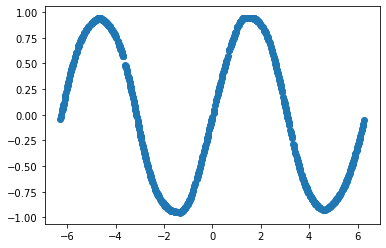

In [41]:
plt.scatter(train_x[0],pred_train[0])

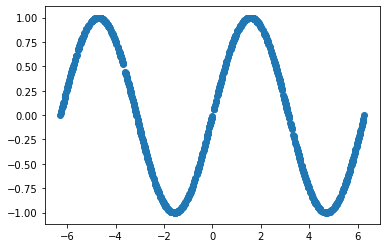

In [42]:
plt.scatter(train_x[0],train_y[0])

In [43]:
test_x=np.array(test).reshape(1,300)
pred_test = predictvals(test_x, parameters,activation='tanh')

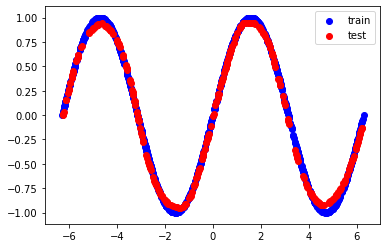

In [44]:
plt.scatter(train_x[0],train_y[0],color='blue')
plt.scatter(test_x[0],pred_test[0],color='red')
plt.legend(['train','test'])
plt.show()

In [35]:
mape=predictmape(train_x,train_y,parameters,lambd=0.1,activation='tanh')
print(mape)

141.95450152979535


In [14]:
valid_err=predicterr(train_x,train_y,parameters,lambd=0.1,activation='tanh',regularisation='L2',cost_func='mse')

In [15]:
print(valid_err)

0.03081419717451911


In [16]:
print(len(parameters))

6
